In [1]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x26118fff848>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08}

## D1: Determine the Summary Statistics for June

In [5]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.tobs).\
    filter(func.strftime ("%m", Measurement.date) == "06").all()
june_temps

[(78.0,),
 (76.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (82.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (73.0,),
 (70.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (73.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),


In [6]:
# 2. Convert the June temperatures to a list.
june_temps = list(np.ravel(june_temps))

june_temps

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [9]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns=["June_Temps"])
june_temps_df.head(10)

,June_Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
5,78.0
6,77.0
7,78.0
8,78.0
9,79.0


In [10]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June_Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [133]:
# 5. Return to your challenge instructions to compare your summary statistics

Text(38.097222222222214, 0.5, 'Count')

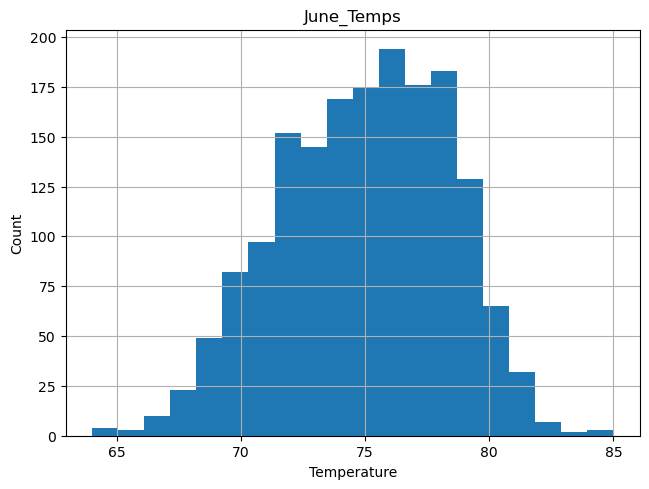

In [39]:
# visualize data for report
import matplotlib.pyplot as plt

# make histogram
june_temps_df.hist(bins=20)
plt.tight_layout()

#set labels
plt.xlabel("Temperature")
plt.ylabel("Count")

In [52]:
june_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
        
june_prcp_df = pd.DataFrame(june_prcp, columns=["Date", "Precipitation"])
june_prcp_df.head()

,Date,Precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00


In [53]:
june_prcp_df.describe()

,Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [54]:
june_prcp_avg = session.query(Measurement.date, func.avg(Measurement.prcp)).\
    filter(func.strftime("%m", Measurement.date) == "06").\
    group_by(Measurement.date).all()

june_prcp_avg = pd.DataFrame(june_prcp_avg, columns =["Date", "Avg_Precipitation"])
june_prcp_avg.head()

,Date,Avg_Precipitation
0,2010-06-01,0.018750
1,2010-06-02,0.007778
2,2010-06-03,0.026667
3,2010-06-04,0.001111
4,2010-06-05,0.011250


In [55]:
june_prcp_avg["Date"] = june_prcp_avg["Date"].str[-2:]         #pd.to_datetime(dec_prcp_avg["Date"]).str[4:]
june_prcp_avg

,Date,Avg_Precipitation
0,01,0.018750
1,02,0.007778
2,03,0.026667
3,04,0.001111
4,05,0.011250
...,...,...
235,26,0.020000
236,27,0.018333
237,28,0.005000
238,29,0.011667


In [56]:
june_prcp_avg = june_prcp_avg.groupby("Date").mean()
june_prcp_avg.head(10)

,Avg_Precipitation
Date,
01,0.212984
02,0.122980
03,0.162051
04,0.288234
05,0.219472
06,0.093491
07,0.085582
08,0.044960
09,0.089988


In [57]:
june_prcp_avg.describe()

,Avg_Precipitation
count,30.000000
mean,0.140569
std,0.055183
min,0.044960
25%,0.102249
50%,0.126213
75%,0.162243
max,0.288234


## D2: Determine the Summary Statistics for December

In [20]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "12").all()

dec_temps

[(76.0,),
 (74.0,),
 (74.0,),
 (64.0,),
 (64.0,),
 (67.0,),
 (77.0,),
 (66.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (74.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (75.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (73.0,),
 (73.0,),
 (77.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (70.0,),
 (73.0,),
 (69.0,),
 (74.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (70.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (63.0,),
 (65.0,),
 (71.0,),
 (76.0,),
 (70.0,),
 (76.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (74.0,),
 (76.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (64.0,),
 (66.0,),
 (73.0,),
 (72.0,),
 (65.0,),
 (64.0,),
 (69.0,),
 (68.0,),
 (77.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (70.0,),
 (72.0,),
 (76.0,),
 (75.0,),
 (69.0,),
 (71.0,),
 (71.0,),


In [21]:
# 7. Convert the December temperatures to a list.
dec_temps = list(np.ravel(dec_temps))
dec_temps

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [22]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=["December_Temps"])
dec_temps_df.head(10)

,December_Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
5,67.0
6,77.0
7,66.0
8,69.0
9,68.0


In [23]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December_Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [24]:
# 10. Return to your challenge instructions to compare your summary statistics

In [25]:
# Combine descriptive data into dataframe

dec_info = dec_temps_df.describe()
june_info = june_temps_df.describe()

temps_summary_df = june_info.merge(dec_info, left_index=True, right_index=True)
temps_summary_df

,June_Temps,December_Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


Text(38.097222222222214, 0.5, 'Count')

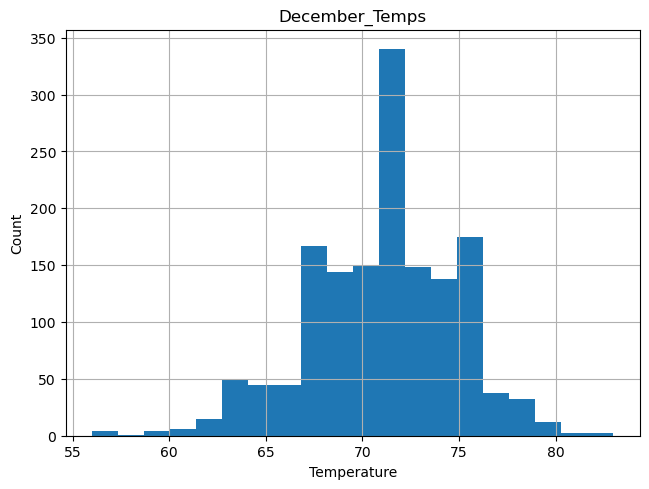

In [38]:
# visualize data for report
# make histogram

dec_temps_df.hist(bins=20)
plt.tight_layout()

#set labels
plt.xlabel("Temperature")
plt.ylabel("Count")

In [45]:
dec_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
        
dec_prcp_df = pd.DataFrame(dec_prcp, columns=["Date", "Precipitation"])
dec_prcp_df.head()

,Date,Precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00


In [46]:
dec_prcp_df.describe()

,Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [71]:
dec_prcp_avg = session.query(Measurement.date, func.avg(Measurement.prcp)).\
    filter(func.strftime("%m", Measurement.date) == "12").\
    group_by(Measurement.date).all()

dec_prcp_avg = pd.DataFrame(dec_prcp_avg, columns =["Date", "Avg_Precipitation"])
dec_prcp_avg.tail()

,Date,Avg_Precipitation
212,2016-12-27,0.040000
213,2016-12-28,0.068333
214,2016-12-29,0.396667
215,2016-12-30,0.558333
216,2016-12-31,0.428000


In [48]:
dec_prcp_avg["Date"] = dec_prcp_avg["Date"].str[-2:]         #pd.to_datetime(dec_prcp_avg["Date"]).str[4:]
dec_prcp_avg

,Date,Avg_Precipitation
0,01,0.565000
1,02,0.115714
2,03,0.405000
3,04,0.027143
4,05,0.000000
...,...,...
212,27,0.040000
213,28,0.068333
214,29,0.396667
215,30,0.558333


In [49]:
dec_prcp_avg = dec_prcp_avg.groupby("Date").mean()
dec_prcp_avg.head(10)

,Avg_Precipitation
Date,
01,0.158036
02,0.346709
03,0.243495
04,0.163724
05,0.126469
06,0.054573
07,0.022960
08,0.036697
09,0.109830


In [50]:
dec_prcp_avg.describe()

,Avg_Precipitation
count,31.000000
mean,0.215665
std,0.150109
min,0.022960
25%,0.121483
50%,0.166000
75%,0.273532
max,0.703954


In [66]:
# Merge Precipitation Data to plot
prcp_avg = june_prcp_avg.merge(dec_prcp_avg, left_index=True, right_index=True)

#relabel columns

prcp_avg = prcp_avg.rename(columns={"Avg_Precipitation_x" : "June", "Avg_Precipitation_y":"December"})

prcp_avg.head()

,June,December
Date,,
01,0.212984,0.158036
02,0.122980,0.346709
03,0.162051,0.243495
04,0.288234,0.163724
05,0.219472,0.126469


<Figure size 4000x2000 with 0 Axes>

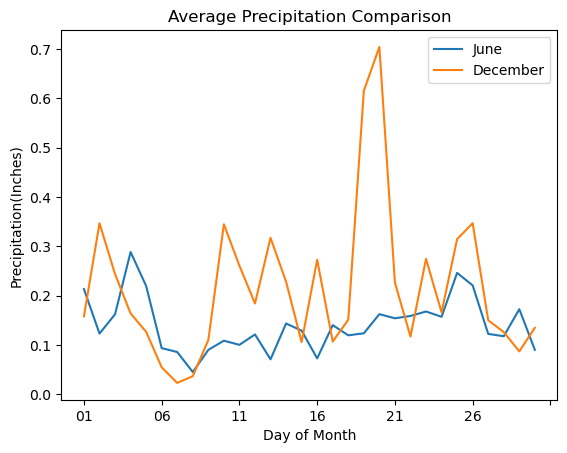

In [67]:
# Plot Avgerage Precipitation comparison

plt.figure(figsize=(20,10), dpi=200)

prcp_avg.plot()

plt.title("Average Precipitation Comparison")
plt.xlabel("Day of Month")
plt.ylabel("Precipitation(Inches)")

plt.legend()

In [74]:
#Query average daily temperature
june_temp_avg = session.query(Measurement.date, func.avg(Measurement.tobs)).\
    filter(func.strftime("%m", Measurement.date) == "06").\
    group_by(Measurement.date).all()

june_temp_avg = pd.DataFrame(june_temp_avg, columns =["Date", "Avg_Temp"])
june_temp_avg.head()

,Date,Avg_Temp
0,2010-06-01,73.555556
1,2010-06-02,74.555556
2,2010-06-03,74.444444
3,2010-06-04,72.888889
4,2010-06-05,76.000000


In [75]:
june_temp_avg["Date"] = june_temp_avg["Date"].str[-2:]         #pd.to_datetime(dec_prcp_avg["Date"]).str[4:]
june_temp_avg

,Date,Avg_Temp
0,01,73.555556
1,02,74.555556
2,03,74.444444
3,04,72.888889
4,05,76.000000
...,...,...
235,26,79.000000
236,27,78.000000
237,28,77.666667
238,29,77.142857


In [76]:
june_temp_avg = june_temp_avg.groupby("Date").mean()
june_temp_avg.head()

,Avg_Temp
Date,
01,74.823909
02,74.404117
03,74.143353
04,73.615575
05,74.717411


In [82]:
dec_temp_avg = session.query(Measurement.date, func.avg(Measurement.tobs)).\
    filter(func.strftime("%m", Measurement.date) == "12").\
    group_by(Measurement.date).all()

dec_temp_avg = pd.DataFrame(dec_temp_avg, columns =["Date", "Avg_Temp"])
dec_temp_avg.head()

,Date,Avg_Temp
0,2010-12-01,73.125000
1,2010-12-02,72.500000
2,2010-12-03,71.875000
3,2010-12-04,74.857143
4,2010-12-05,71.285714


In [83]:
dec_temp_avg["Date"] = dec_temp_avg["Date"].str[-2:]

dec_temp_avg = dec_temp_avg.groupby("Date").mean()
dec_temp_avg.tail()

,Avg_Temp
Date,
27,71.782313
28,70.582483
29,70.329082
30,69.930272
31,68.246939


In [86]:
temp_avg = june_temp_avg.merge(dec_temp_avg, left_index=True, right_index=True)

temp_avg = temp_avg.rename(columns={"Avg_Temp_x" : "June", "Avg_Temp_y":"December"})

temp_avg

,June,December
Date,,
01,74.823909,72.021088
02,74.404117,71.382653
03,74.143353,72.802154
04,73.615575,72.326531
05,74.717411,70.986224
06,75.207589,69.702098
07,75.133929,69.302154
08,75.648562,70.474490
09,75.177331,71.862812


<Figure size 4000x2000 with 0 Axes>

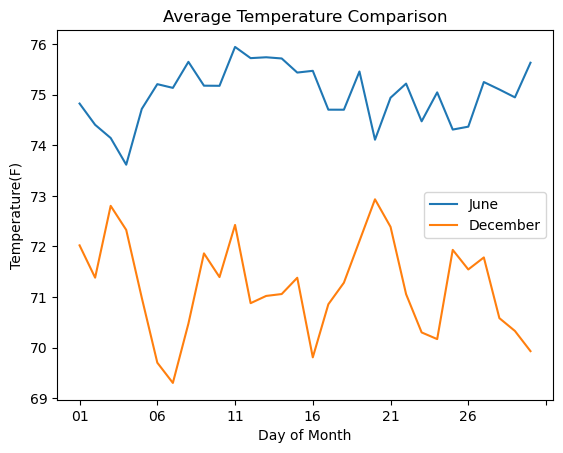

In [85]:
# Plot Avgerage temp comparison

plt.figure(figsize=(20,10), dpi=200)

temp_avg.plot()

plt.title("Average Temperature Comparison")
plt.xlabel("Day of Month")
plt.ylabel("Temperature(F)")

plt.legend()